In [106]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
df = pd.read_csv('Data/train.csv')

# Provincias con propiedades más antiguas y más nuevas

In [107]:
#Elimino las propiedades con un NAN en provincia
df = df.dropna(subset=['provincia'])

#Remplazo Baja California Norte por Baj
#df['provincia'].replace(["Baja California Norte", "Baja California Sur"], "Baja California", inplace=True)

#Calculo el promedio de antiguedad por provincia
provincia_antiguedad = df.groupby("provincia")["antiguedad"].mean()

In [108]:
#Creo mi mapa de mexico
mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME

#Le pongo los tildes al archivo de estados para que me coincidan con las provincias
mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)

#Hago un nuevo dataframe con la información del mapa y la antiguedad para cada provincia
gdf = mexico.set_index("ADMIN_NAME").join(provincia_antiguedad)

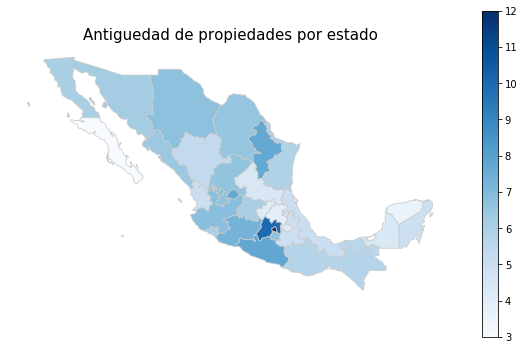

In [110]:
#Grafico el mapa

#Base donde se va a dibujar
fig, base = plt.subplots(1, figsize=(10, 6))

#Saco los ejes de lat y lng ya que no aportan al gráfico
base.axis("off")

#Pido que me coloreé en base a la antiguedad
gdf.plot(column="antiguedad", cmap="Blues", linewidth=0.8, ax=base, edgecolor="0.8")

#Setteo el título al gráfico
base.set_title("Antiguedad de propiedades por estado", fontsize = 15)

#Agrego la barra que indica la antiguedad
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=3, vmax=12))
cbar = fig.colorbar(sm)